In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("User_Data(1).csv")  
data_set=pd.read_csv("User_Data(1).csv")  

In [3]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#We will use the Age and EstimatedSalary as Input while the purchased will be the output

In [5]:
x = data_set[['Age','EstimatedSalary']]
y = data_set['Purchased']

In [6]:
#So to make our model not to be biased, we need to scale down the input with standardization so
#that it will be of the same scale with the output. We do it this way:

In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x = st_x.fit_transform(x)   

In [8]:
#So after standardizing, we will now split the input and output datasets into training and testing dataset.

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)

In [10]:
#After splitting the dataset, we can now import theKNeighborsClassifier class to create the KNN model.

In [27]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 




KNeighborsClassifier()

In [28]:
y_pred= classifier.predict(x_test)  

In [29]:
#To evaluate the model prediction, we have to use the confusion matrix, because the confusion 
#matrix is an evaluation technique for classification algorithms. So we import the confusion matrix,  
#classification_report, accuracy_score


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.93

In [31]:
cm

array([[59,  4],
       [ 3, 34]], dtype=int64)

In [32]:
#The next step is to visualize the model output using the code below
 

C:\Users\visit\AppData\Local\Temp\ipykernel_26208\2794694066.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


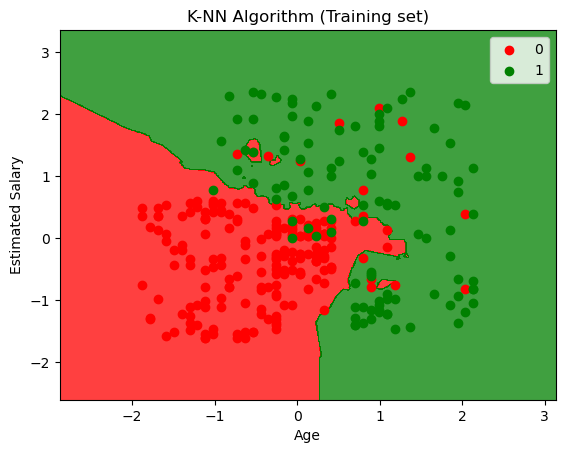

In [33]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), 
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  


# Model Evaluation

In [34]:
#As usual, we start by importing the GridSearchCV class like this below

from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
"n_neighbors": list(range(1,21)),
"metric":["euclidean", "manhattan", "chebyshev", "minkowski"],
"weights":["uniform","distance","density"],
"algorithm":["auto", "ball_tree", "kd_tree", "brute"],
"p": [1,2,3,4]
}


In [36]:
#We import the KNN class
from sklearn.neighbors import KNeighborsClassifier  
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [37]:
#Then we can now pass the dataset to this GridSearch
grid_search.fit(x_train, y_train)

C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6400 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\visit\anaconda3\Lib\site-pa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance', 'density']},
             scoring='accuracy')

In [38]:
#We can now get the best hyperparameters like this below

best_params = grid_search.best_params_
print(best_params)

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 4, 'weights': 'uniform'}


In [39]:
#We can now create a model from this GridSerach like this

best_model = grid_search.best_estimator_

In [40]:
Z_pred = best_model.predict(x_test)

In [41]:
#To get the accuracy score of this hyper-parameter optimised model
best_score = grid_search.best_score_
best_score

0.9066666666666666